# Load dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("combined2.csv",delimiter=",")

In [3]:
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by=['Date'])
df = df.set_index(df.Date)
df = df.drop(['Date','Unnamed: 0'],axis=1)

In [4]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,government_performance,...,apr_temp,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,Belgium,0,0,0,3/18/2020,5.0,1,2.0,7.0,6.0,...,8.145482,12.398000,15.434529,17.238529,17.183294,14.427412,10.678388,5.761971,3.113924,9.514241
2020-01-22,Israel,0,0,0,4/2/2020,9.0,1,4.0,10.0,10.0,...,18.818000,21.895714,24.751714,26.449429,26.681571,25.123857,22.219000,17.569286,13.401857,19.698000
2020-01-22,Denmark,0,0,0,3/11/2020,5.0,1,10.0,3.0,5.0,...,5.867971,10.773036,14.401786,15.891429,15.902357,13.007679,9.359057,4.942146,1.645598,7.818978
2020-01-22,Slovenia,0,0,0,3/16/2020,7.5,1,2.0,8.0,8.0,...,7.578856,12.163411,15.398967,17.378222,16.942333,13.865478,9.208933,3.580752,-0.791111,8.040211
2020-01-22,North Macedonia,0,0,0,3/19/2020,7.0,1,2.0,5.0,7.0,...,9.233964,13.985727,17.421182,19.846727,19.731727,16.310454,10.784882,5.366073,0.732434,9.853518


In [5]:
df['Country/Region'].unique()

array(['Belgium', 'Israel', 'Denmark', 'Slovenia', 'North Macedonia',
       'Ireland', 'Italy', 'Ukraine', 'France', 'Croatia',
       'United Kingdom', 'Japan', 'Germany', 'Netherlands', 'Switzerland'],
      dtype=object)

In [6]:
nl = df[df['Country/Region']=="Netherlands"]
indexName = nl.index.strftime('%m/%d/%Y')
ind = np.arange(0,len(nl),5)
indNames = [indexName[i] for i in range(len(nl)) if i %5 ==0]

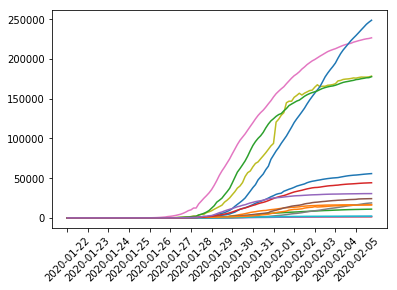

In [15]:
ticks = list(df.index.unique().strftime('%Y-%m-%d'))
tick_range = list(range(len(ticks)))
del tick_range[2-1::2]
del tick_range[2-1::2]
del tick_range[2-1::2]
for uniqueCountry in df['Country/Region'].unique():
    plt.plot(df.Confirmed[df['Country/Region']==uniqueCountry].values,label=uniqueCountry)
    plt.xticks(tick_range,ticks, rotation=45)

In [28]:
fig, axs = plt.subplots(2,figsize=(15, 4),sharex=True)

for uniqueCountry in df['Country/Region'].unique(): 

    axs[0].plot(df.Confirmed[df['Country/Region']==uniqueCountry],label=uniqueCountry)
#     axs[0].xaxis.set_visible(False)
#     plt.legend()
#     axs[1].set_xticks(ind) 
#     axs[1].set_xticklabels([indNames], fontsize=12)
    plt.setp(axs[1].get_xticklabels(), visible=True, rotation=90)
    axs[0].set_xticks(range(len(ticks)),ticks)

    axs[1].plot(df.Deaths[df['Country/Region']==uniqueCountry])
#     plt.show()

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [8]:
# dfConfirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
# dfDeath = pd.read_csv("time_series_covid19_deaths_global.csv")
# dfRecovered = pd.read_csv("time_series_covid19_recovered_global.csv")

# #rename columns
# dfConfirmed.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)
# dfDeath.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)
# dfRecovered.rename(columns={'Province/State': 'province', 'Country/Region': 'country'}, inplace=True)

# data = [dfConfirmed,dfDeath,dfRecovered]

# Data visualization on provinces

##### Plot confirmed, recovered and deaths per regios

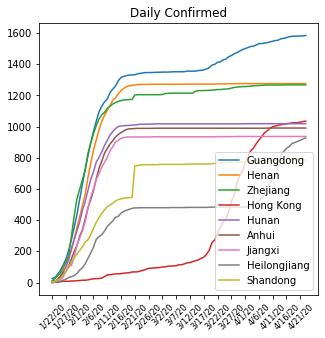

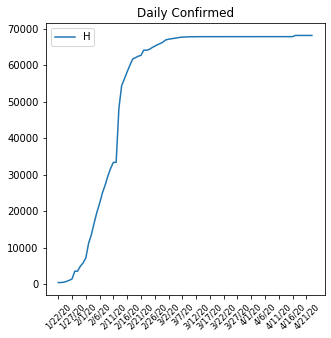

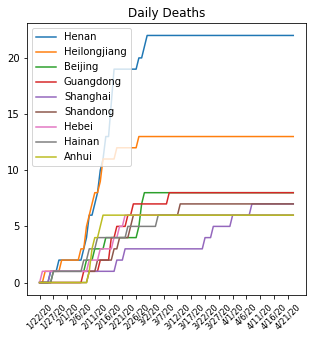

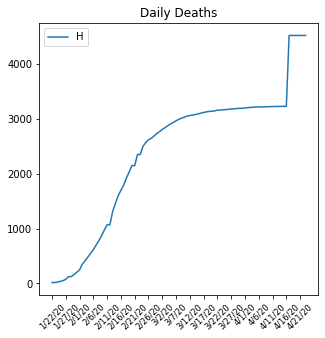

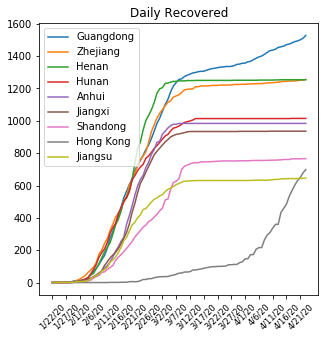

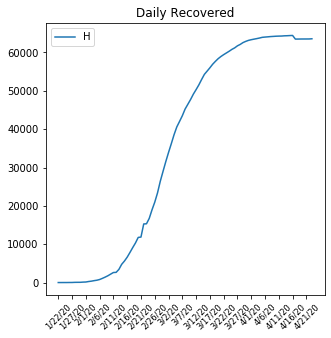

In [8]:
def selectCountry(countryName,df):
    df = df.loc[df['country'] == countryName]
    df = df.drop(['Lat','Long','country'], axis=1)
    df = df.set_index('province').T
    sortedProvinces = df.max().sort_values(ascending=False).index
    return sortedProvinces,df

def plot_regions(df,plotted_columns,title): 
    fig,ax = plt.subplots(figsize=[5,5])
    
    ind = np.arange(0,len(df),5)
    indNames = [df.index[i] for i in range(len(df)) if i %5 ==0]

    lineObjects = ax.plot(df[plotted_columns]);
    plt.xticks(ind,indNames, rotation=45,fontsize='small')
    plt.legend(iter(lineObjects), (plotted_columns))
    plt.title(title)
    plt.show();
    

datasets = [dfConfirmed, dfDeath, dfRecovered]
countries = ['China']
provinces,dfs = [],[]
titles = ['Daily Confirmed','Daily Deaths', 'Daily Recovered'] 

for country in countries:
    for dataset in datasets:       
        provinces.append(selectCountry(country, dataset)[0])
        dfs.append(selectCountry(country, dataset)[1])

for i in range(len(dfs)):
    plot_regions(dfs[i],provinces[i][1:10],titles[i])
    plot_regions(dfs[i],provinces[i][0],titles[i])

# Experiments

##### Drop lat, long and province columns

##### Check countries with top confirmed cases in last day

In [ ]:
# lastCol = dfConfirmed.iloc[:,[1,-1]]
# sorted_last = last.sort_values(by=last.columns[1],ascending=False)
# sorted_last = sorted_last.iloc[:30,:]
# # topTen = sorted_last.country.tolist()
# topTwenty = sorted_last.country.tolist()
# # topTwenty
# # nonEurope = ['US', 'Iran', 'China',"Brazil", "India", "Canada", "Peru"]
# # topEurope = [topTwenty[i] for i in topTwenty and i not in nonEurope]

### Take only european countries

In [9]:
europe = pd.read_csv("Countries-Europe.csv")
europe = europe.name.tolist()
europe = list(set([i for i in dfConfirmed.country if i in europe])) #get european countries present in dataset

#define european dataframes
EuConfirmed = dfConfirmed[dfConfirmed.country.isin(europe)]
EuRecovered = dfRecovered[dfRecovered.country.isin(europe)]
EuDeath = dfDeath[dfDeath.country.isin(europe)]

#store dataframes in list
EU = [EuConfirmed,EuRecovered,EuDeath]
EUNames = ['EuConfirmed', 'EuRecovered','EuDeath']

#Filter out non european provinces and drop lat, long and province column
for i in range(len(EU)):
    EU[i] = EU[i].loc[EU[i].province.isnull()]
    EU[i] = EU[i].drop(['Lat','Long','province'],axis=1)

##### EXPERIMENT: Check for european provinces only don't need to load anymore

In [8]:
# #Sort out non european provinces
# europeans = [i for i in dfConfirmed.country if i in europe]
# CountsEU={}
# for item in europeans:
#     CountsEU[item]=europeans.count(item)
    
# multipleEU = list(dict((k, v) for k, v in CountsEU.items() if v > 1).keys())

# EuConfirmed = EuConfirmed[EuConfirmed.country.isin(CountsEU)]

# multipleProvinces = multipleProvinces.sort_values(by='country')
# multipleProvinces = multipleProvinces[multipleProvinces.province.isnull()]

Conclusion: if provinces == NaN, country == in europe

##### Seperate top 5 countries by rest by numbers of last taken data

In [44]:
EU[0]

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
1,Albania,0,0,0,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842
3,Andorra,0,0,0,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,751,752
16,Austria,0,0,0,0,0,0,0,0,0,...,15357,15402,15452,15531,15558,15597,15621,15650,15684,15752
22,Belarus,0,0,0,0,0,0,0,0,0,...,12208,13181,14027,14917,15828,16705,17489,18350,19255,20168
23,Belgium,0,0,0,0,0,0,0,0,0,...,47334,47859,48519,49032,49517,49906,50267,50509,50781,51420
27,Bosnia and Herzegovina,0,0,0,0,0,0,0,0,0,...,1585,1677,1757,1781,1839,1857,1926,1946,1987,2027
30,Bulgaria,0,0,0,0,0,0,0,0,0,...,1399,1447,1506,1555,1594,1618,1652,1704,1778,1829
87,Croatia,0,0,0,0,0,0,0,0,0,...,2047,2062,2076,2085,2088,2096,2101,2112,2119,2125
90,Cyprus,0,0,0,0,0,0,0,0,0,...,837,843,850,857,864,872,874,878,883,889
94,Denmark,0,0,0,0,0,0,0,0,0,...,8851,9008,9158,9311,9407,9523,9670,9821,9938,10083


## Divide European countries by top 5 and rest

In [17]:
EUSorted = EU[0].sort_values(by=[EU[0].columns[-1]],ascending=False) #select top 5 based on latest measurements

#Define top 5 countries with highest rates and others
EuHigh = list(EUSorted.country.iloc[:5])
EuLow = (EUSorted.country.iloc[5:])
dfHigh,dfLow = [],[]
for dataset in EU: 
    dfHigh.append(dataset[dataset.country.isin(EuHigh)])
    dfLow.append(dataset[dataset.country.isin(EuLow)])

##### Plot top 5 countries and rest separately

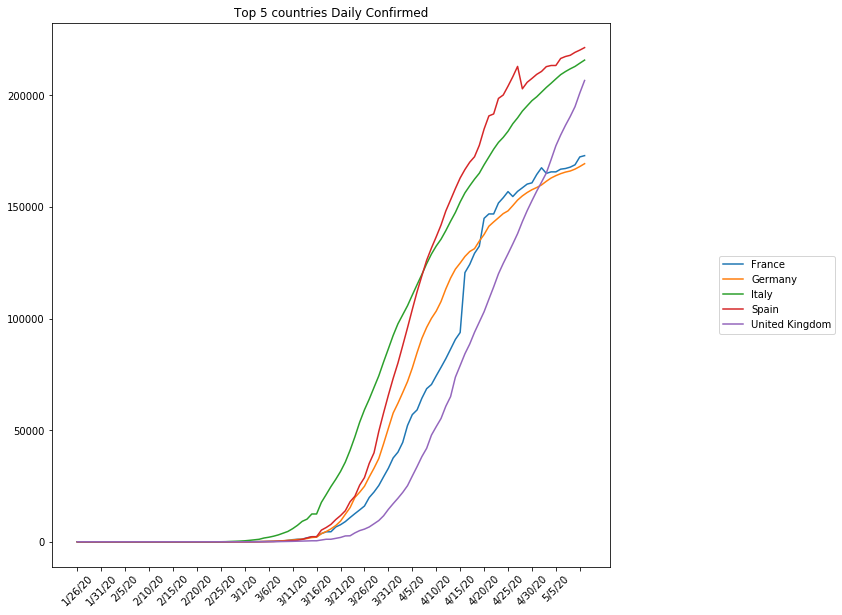

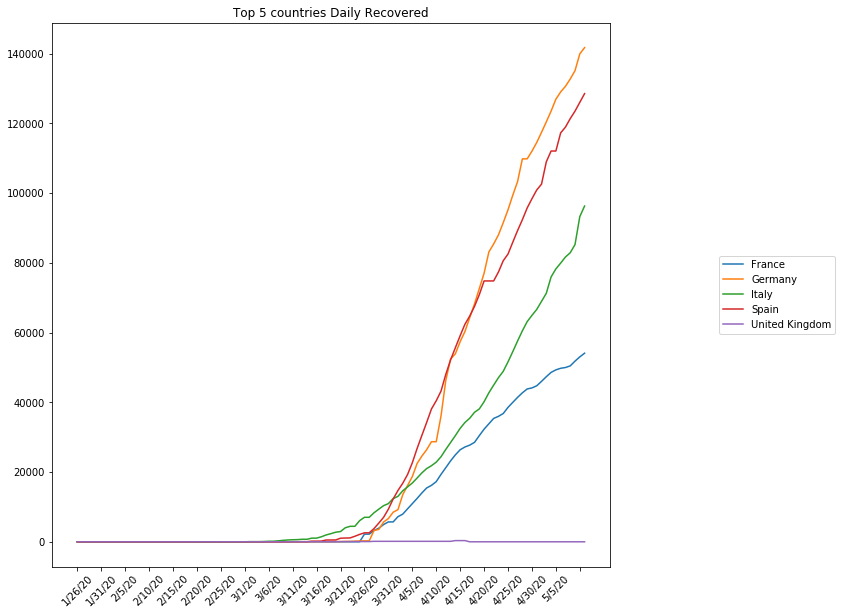

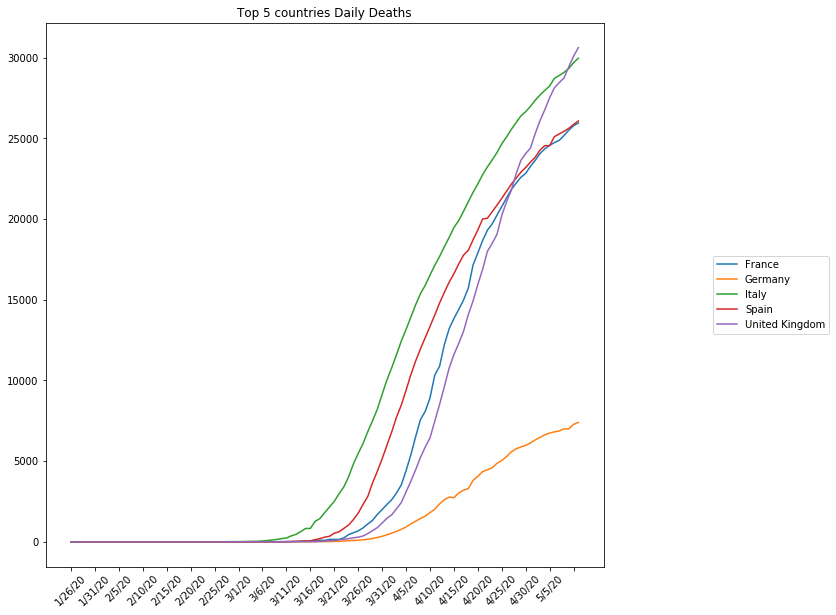

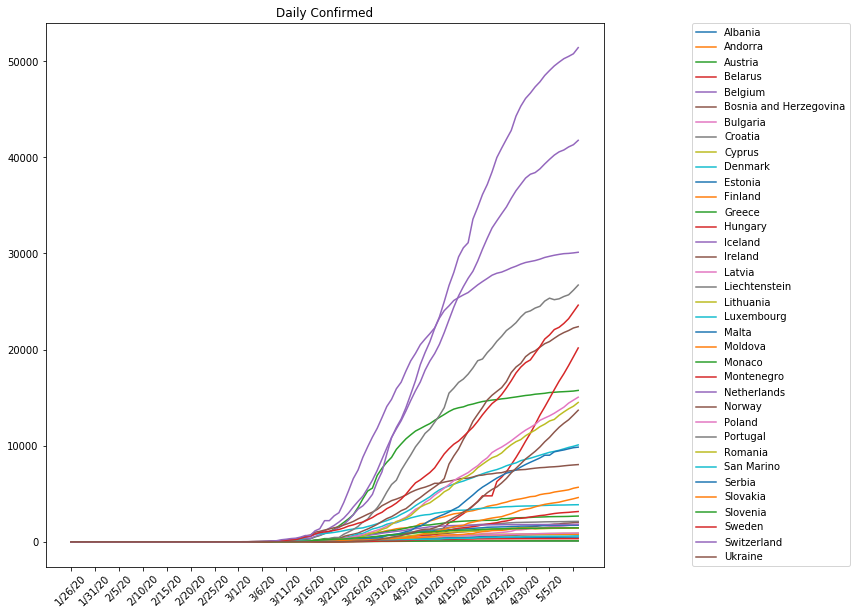

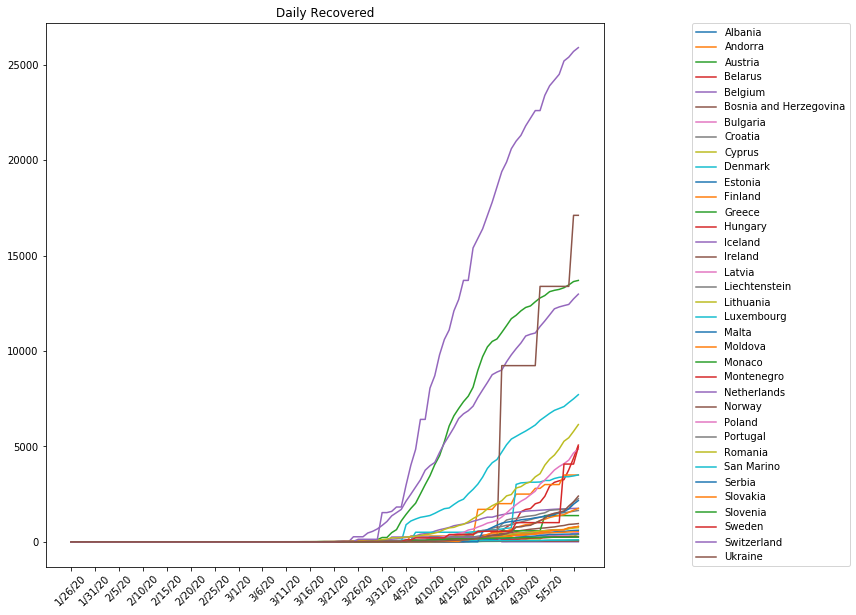

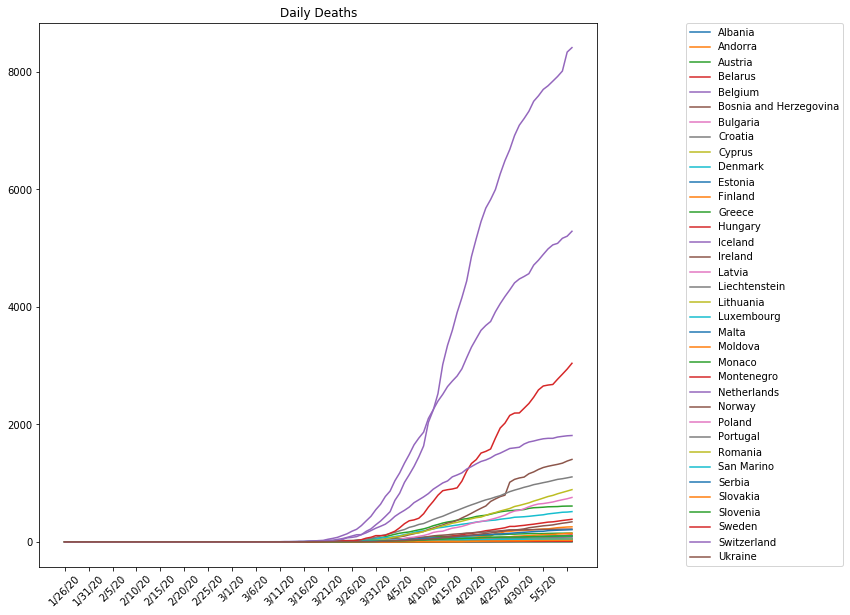

In [19]:
titlesTop = ['Top 5 countries Daily Confirmed', 'Top 5 countries Daily Recovered', 'Top 5 countries Daily Deaths']
titles = ['Daily Confirmed', 'Daily Recovered', 'Daily Deaths']

indexData = EU[0].iloc[:,1:].shape[1]


def plotfigs(dfs,titles):
    i = 0
    for dataset in dfs:
        fix,ax = plt.subplots(figsize=[10,10])
        for index,row in dataset.iterrows():    
            label = row.country
            data = row[1:]
            ind = np.arange(0,indexData,5)
            indNames = [row.index[i] for i in range(1,indexData) if i % 5 == 0]
            
            plt.plot(data,label=label)   
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
            plt.xticks(ind,indNames,rotation=45)
            plt.title(titles[i])
            lgd = ax.legend(loc=10, bbox_to_anchor=(1.3,0.5))
            plt.savefig(titles[i]+' week19'+'.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
        i+=1
        
plotfigs(dfHigh,titlesTop)
plotfigs(dfLow,titles)

##### OLD: Plot confirmed per country

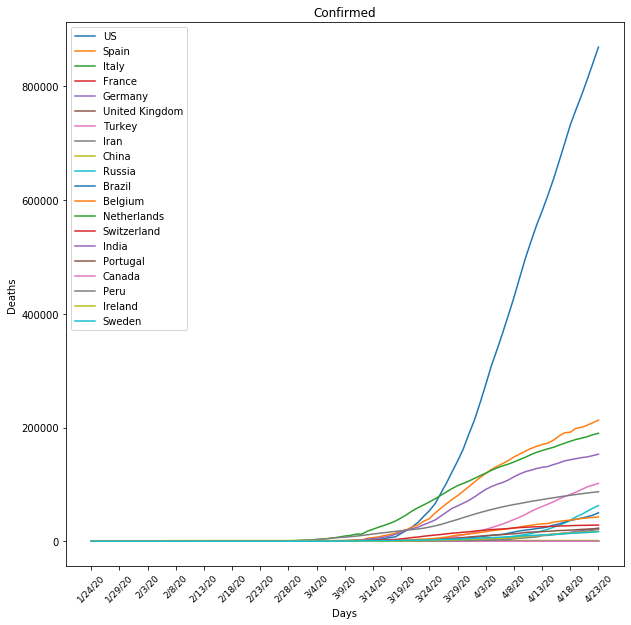

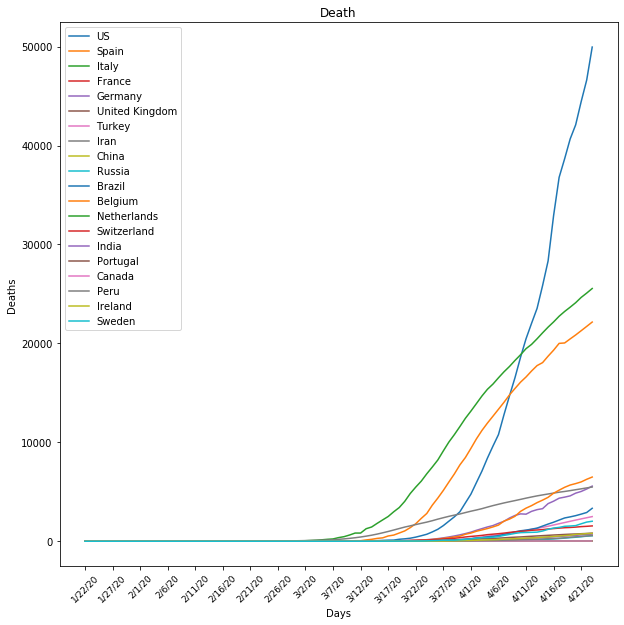

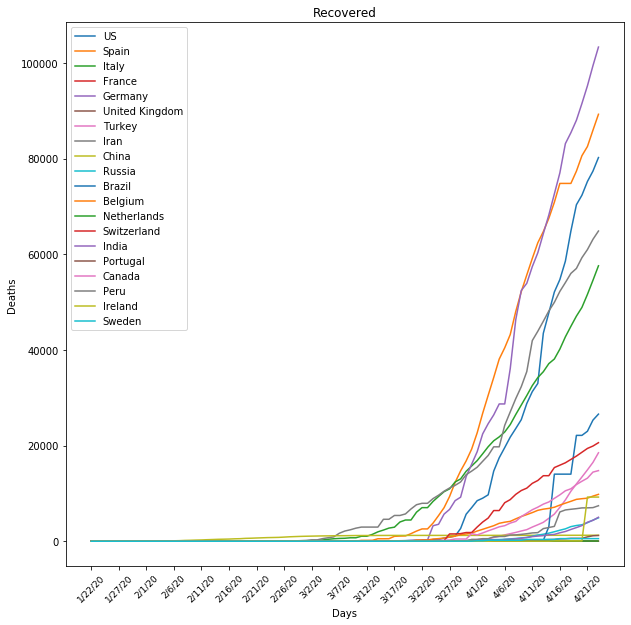

In [82]:
def plot_days(df,countryname,title):
    country = df[df.country == countryname]
    country = country.drop(country.columns[0:4], axis=1) #only keep days
    if len(country) > 1:
        country.drop(country.head(len(country)-1).index,inplace=True) #select only one country
    country = country.T
    
    ind = np.arange(0,len(country),5)
    indNames = [country.index[i] for i in range(len(country)) if i %5 == 0]
    
    plt.plot(country.index,country,label=countryname)
    plt.xticks(ind,indNames,rotation=45,fontsize=9);
    plt.xlabel("Days")
    plt.ylabel("Deaths")
    plt.title(title)
    plt.legend()
    plt.savefig(title+'.png')
    return country
    
# countries = ['Netherlands','Austria','China']
datasets = [dfConfirmed, dfDeath, dfRecovered]
titles = ['Confirmed', 'Death', 'Recovered']
countries = topTen
europeans = [topTen[i] for i in topTen]


for i in range(len(datasets)): 
    fig,ax=plt.subplots(figsize=[10,10])
    for k in countries: 
         plot_days(datasets[i],k,titles[i]);


# Do predictions

## Univariate predictions: SARIMAX

In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

##### Preprocessing datasets

In [21]:
#Get increasing index
def reset_index(df):
    index = np.arange(1,len(df)+1)
    df = df.set_index(index)
    return df

In [201]:
def prep_datasets(lenDf,dfHigh):
    dataFrames = [[] for i in range(lenDf)]
    country5 = [[] for i in range(lenDf)] 
    
    for i in range(len(dfHigh)):
        df = dfHigh[i].T
        new_header = df.iloc[0] #grab the first row for the header
        df = df[:][1:] #take the data less the header row
        df.columns = new_header #set countries as header
        dataFrames[i] = df
        
        index = pd.date_range(start=rangestart, periods=len(df), freq='D')
        countries = []
        for country in df.columns: 
            data = pd.to_numeric(df[country])
            data = pd.Series(np.asarray(data),index=index,name=country)
            countries.append(data)
        country5[i] = countries
    return dataFrames,country5
       
countryNames = []
lenDf = len(dfHigh)
dfs = prep_datasets(lenDf, dfHigh)
dataFrames,countries = prep_datasets(lenDf,dfHigh)
countryNames.append(dataFrames[0].columns)
countryNames = countryNames[0]

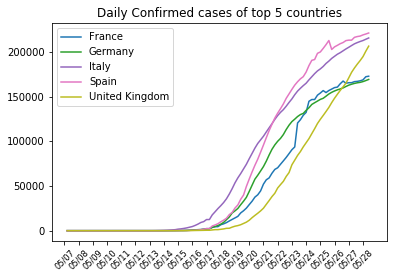

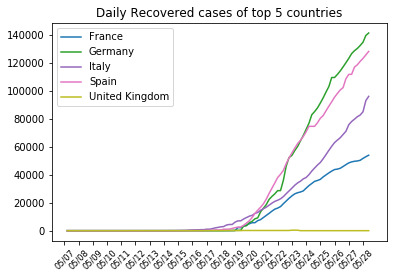

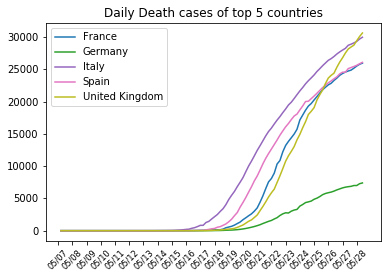

In [208]:
rangestart = EU[0].columns[-1]

def sarimax_europe(countries,countryNames):
    titles = ['Confirmed', 'Recovered','Death']
    for case in range(len(countries)): #loop over all three cases Confirmed, Recovered and Death
        for country in range(len(countries[case])): #Loop over all 5 within these three cases
            data=countries[case][country]
            for i in range(10): #Do predictions and add to previous dataframe
                mod = sm.tsa.SARIMAX(data, order=(1, 0, 0), trend='c')
                res = mod.fit()
                new = pd.DataFrame([pd.Series([int(res.forecast())])])
                data = pd.concat([data,new])
                data = reset_index(data)
            indNames = list(countries[case][country].index.strftime('%m/%d'))
            ind = np.arange(0,len(indNames),5)
            plt.plot(data[:107],label=countryNames[country])
            plt.plot(data[107:],ls="--")
            plt.xticks(ind,indNames,rotation=45,fontsize='small')   
        plt.title("Daily {} cases of {} countries".format(titles[k],"top 5"))
        plt.legend()
        plt.savefig("Daily"+titles[k]+"cases of top 5 countries"+'.png')
        plt.show()
        
sarimax_europe(countries,countryNames)


##### OLD preprocessing:

In [69]:
# #Store top 5 confirmed, recovered and death in lists
# Confirmed = dfHigh[0].T
# new_header = Confirmed.iloc[0] #grab the first row for the header
# Confirmed = Confirmed[1:] #take the data less the header row
# Confirmed.columns = new_header #set countries as header

# conf_countries_5,conf_countryNames_5 = [],[]
# index = pd.date_range(start='2020-01-24', periods=len(Confirmed), freq='D')

# for country in Confirmed.columns: 
#     data = pd.to_numeric(Confirmed[country])
#     data = pd.Series(np.asarray(data),index=index)
#     conf_countries_5.append(data)
#     conf_countryNames_5.append(str(country))


In [74]:
# Confirmed = dfHigh[0].T
# new_header = Confirmed.iloc[0] #grab the first row for the header
# Confirmed = Confirmed[1:] #take the data less the header row
# Confirmed.columns = new_header #set countries as header



# Germany = Confirmed.Germany
# Germany = pd.to_numeric(Germany)
# index = pd.date_range(start='2020-01-24', periods=len(Confirmed), freq='D')
# data = pd.Series(np.asarray(Germany),index=index)



C:\Users\zrivai\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


TypeError: object of type 'int' has no len()

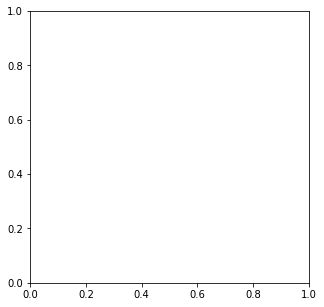

In [74]:
datasets = countries
# titles = ["Cumulative Confirmed", "Recovered", "Deaths"]
titles = countryNames

import warnings
warnings.filterwarnings('ignore')

def model_stuff(datasets,n,titles,maintitle):
    fig,ax = plt.subplots(figsize=[5,5])
    t=0
    for case in datasets:
        for country in case: 
#             lenData = len(country)
            data = country
#             lendata = len(data)

#             ind = np.arange(0,len(data),5)
#             indNames = [index[i].strftime("%m/%d") for i in range(len(data)) if i %5 ==0]
            
#             for i in range(n):
#     #             if i % 5 == 0:
#     #                 print("{} Rounds done".format(i))

            mod = sm.tsa.SARIMAX(data, order=(1, 0, 0), trend='c')
#             res = mod.fit()
#             new = pd.DataFrame([pd.Series([int(res.forecast())])])

#             data = pd.concat([data,new])
#             data = reset_index(data)

#         plt.plot(data[:107])
#         plt.plot(data[:lendata],label=titles[country])
#         plt.plot(data[lendata:],ls='--')
#         plt.title('Daily {} top 5 countries in Europe'.format(maintitle[t]))
#         plt.xticks(ind,indNames, rotation=45,fontsize='small');
#         plt.legend()
        t +=1

n= 10
maintitle = ['Confirmed', 'Recovered', 'Death']
model_stuff(datasets,n,titles, maintitle)

# for i in dfHigh:
#     model_stuff(datasets,n,titles, maintitle)

## Kalman filter